# 用 Matplotlib 绘制酒的类型和质量视图

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 为红葡萄酒条柱高度和白葡萄酒条柱高度创建数组
记住，颜色和质量等级的每个组合有一个条柱。每个条柱的高度基于这个颜色与这个质量等级的样本的比例。
1. 红葡萄酒条柱比例 = 每个质量等级的数量 / 红葡萄酒样本的总数
2. 白葡萄酒条柱比例 = 每个质量等级的数量 / 白葡萄酒样本的总数

In [3]:
# 获取每个等级和颜色的数量
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [4]:
# 获取每个颜色的总数
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [5]:
# 将红葡萄酒等级数量除以红葡萄酒样本总数，获取比例
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [6]:
# 将白葡萄酒等级数量除以白葡萄酒样本总数，获取比例
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### 在柱状图上绘制比例
设置每个等级组的 x 坐标位置和每个条柱的宽度。

In [23]:
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [29]:
ind = np.arange(len(red_proportions)-1)

In [30]:
ind

array([0, 1, 2, 3, 4, 5])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

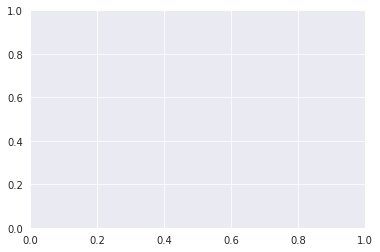

In [31]:
plt.bar(ind, height = red_proportions);

In [24]:
ind = np.arange(len(red_proportions))  # 组的 x 坐标位置
width = 0.35       # 条柱的宽度

现在创建图表。

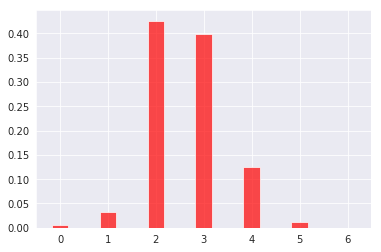

In [21]:
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')

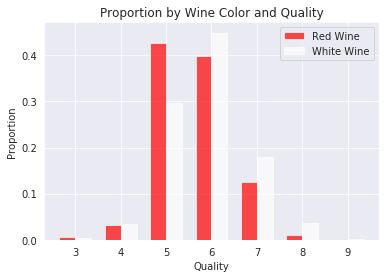

In [22]:
width = 0.35

# 绘制条柱
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# 标题和标签
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['3', '4', '5', '6', '7', '8', '9']  # x 坐标刻度标签
plt.xticks(locations, labels)

# 图例
plt.legend()

操作没有成功，因为缺少第 9 等级的红葡萄酒值。虽然这个数字是 0，但是绘图时仍然需要写出。运行下面的框之后，再运行上面最后两个框。

In [9]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64